In [80]:
from sklearn.datasets import fetch_california_housing

In [81]:
housing = fetch_california_housing()

In [82]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [83]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [84]:
housing.data[:,0]

array([8.3252, 8.3014, 7.2574, ..., 1.7   , 1.8672, 2.3886])

In [85]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [86]:
print(housing.target_names)

['MedHouseVal']


In [87]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [88]:
print(housing.data.shape)

(20640, 8)


In [89]:
print(housing.target.shape)

(20640,)


## Splitting the Data

In [90]:
n = int(0.8*housing.data.shape[0])
X_train = housing.data[:n,:]
Y_train = housing.target[:n]
X_cv = housing.data[n:,:]
Y_cv = housing.target[n:]

In [91]:
X_train.shape

(16512, 8)

In [92]:
Y_train.shape

(16512,)

In [93]:
X_cv.shape

(4128, 8)

In [94]:
Y_cv.shape

(4128,)

## Cost Function

In [95]:
import numpy as np

In [119]:
def cost(x, y, w, b):
    m = x.shape[0]
    z = (np.dot(x,w) + b - y)

    cost = np.sum(z**2)/(2*m)
    return cost



    # m = x.shape[0] 
    
    # # You need to return this variable correctly
    # total_cost = 0
    
    # ### START CODE HERE ###
    # for i in range(m):
    #     cost = w*x[i] + b - y[i]
    #     cost = cost**2
    #     total_cost += cost
    
    # total_cost = total_cost/(2*m)
    # ### END CODE HERE ### 

    # return total_cost

## Derivative

In [120]:
def derivative(x, y, w, b):
    m = x.shape[0]  # Number of training examples

    z = np.dot(x, w) + b - y  # Compute the difference
    dj_dw = (1/m) * np.dot(x.T, z)  # Vectorized gradient for weights
    dj_db = np.mean(z)  # Scalar gradient for bias

    return dj_dw, dj_db





    # m = x.shape[0]
    
    # # You need to return the following variables correctly
    # dj_dw = 0
    # dj_db = 0
    
    # ### START CODE HERE ###
    # for i in range(m):
    #     cost = w*x[i] + b - y[i]
    #     dj_dw += cost*x[i]
    #     dj_db += cost
    
    # dj_dw /= m
    # dj_db /= m
    # ### END CODE HERE ### 
        
    # return dj_dw, dj_db


## Gradient Decent

In [121]:
import copy
import math

In [143]:
def gradient_decent(x, y, w, b, alpha, derivative, cost, iterations):
    m = x.shape[0]  # Number of training examples
    cost_history = []

    w_c = w.copy()  
    b_c = b  
    for i in range(iterations):
        dj_dw, dj_db = derivative(x, y, w_c, b_c) 
        w_c -= alpha * dj_dw  
        b_c -= alpha * dj_db  

        cost_value = cost(x, y, w_c, b_c)  
        cost_history.append(cost_value)

        if i % (iterations/10) == 0: 
            print(f"Iteration {i}: Cost = {cost_value}")

    return w_c, b_c, cost_history  

 




# def gradient_decent(x, y, w_in, b_in,   alpha, gradient_function,cost_function, num_iters): 

#     m = len(x)
    
#     # An array to store cost J and w's at each iteration — primarily for graphing later
#     J_history = []
#     w_history = []
#     w = copy.deepcopy(w_in)  #avoid modifying global w within function
#     b = b_in
    
#     for i in range(num_iters):

#         # Calculate the gradient and update the parameters
#         dj_dw, dj_db = gradient_function(x, y, w, b )  

#         # Update Parameters using w, b, alpha and gradient
#         w = w - alpha * dj_dw               
#         b = b - alpha * dj_db               

#         # Save cost J at each iteration
#         if i<100000:      # prevent resource exhaustion 
#             cost =  cost_function(x, y, w, b)
#             J_history.append(cost)

#         # Print cost every at intervals 10 times or as many iterations if < 10
#         if i% math.ceil(num_iters/10) == 0:
#             w_history.append(w)
#             print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
#     return w, b, J_history

        

## Training the algorithm

In [167]:
w = np.zeros(X_train.shape[1])
b = 0
alpha = 0.0000002
iterations = 10000

In [168]:
w, b, cost_history = gradient_decent(X_train, Y_train, w, b, alpha, derivative, cost, iterations)

Iteration 0: Cost = 1.5933889863254544
Iteration 1000: Cost = 0.6993500857702818
Iteration 2000: Cost = 0.643652464495679
Iteration 3000: Cost = 0.6390671800449113
Iteration 4000: Cost = 0.6381277014589137
Iteration 5000: Cost = 0.6374551842509908
Iteration 6000: Cost = 0.6368087897828185
Iteration 7000: Cost = 0.636171048507747
Iteration 8000: Cost = 0.6355404067198297
Iteration 9000: Cost = 0.63491645993131


In [169]:
import matplotlib.pyplot as plt

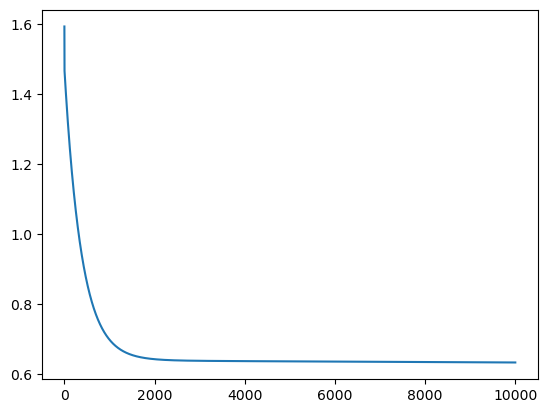

In [170]:
plt.plot( range(iterations), cost_history)

In [171]:
Y_pred = np.dot(X_cv, w) + b - Y_cv

In [172]:
Y_pred

array([0.42767625, 0.72436991, 1.10017713, ..., 1.06376468, 1.14870867,
       1.0881048 ])

In [173]:
from sklearn.metrics import mean_squared_error

In [174]:
mse = mean_squared_error(Y_cv, Y_pred)

In [175]:
mse

11.912375633268146

In [176]:
print("Hello")

Hello
